# Challenge: Model Comparison

You now know 2 kinds of regression models and 2 kinds of classifier models. Comparing models is something data scientists do all the time. Learning to choose the best model for a given situation is very important.

Find a dataset and build a KNN Regression and an OLS regression. How similar are they? Do they miss in different ways?

Describe the models' behaviors and why you favor 1 model or the other. Is there a situation where you would change your mind, or whether one is unambiguously better than the other? Lastly, what is it about the data that causes the better model to outperform the weaker model?

## Feedback
What is the difference between sklearn.linear_model and statsmodels.formula.api.ols? I believe I could do more feature engineering here to make sure my KNN model performs better. I'm having trouble explaining why my OLS model so dramatically outperforms my KNN one.

Looks like you are not comparing apples to apples. I have observations
- You are training KNN of X_train and testing on X_test while regression model you are training on complete dataset.
- Cross Val score gives you the mean of R^2 score of 5 folds of data while you are comparing it with R^2 of the complete dataset on linear regression. Either you compare R^2 of complete data in KNN (google and find out how to get that :)) or take cross val score of 5 folds in linear regression. 
Things will be clear when you do this.
Also sklearn.linear_model and statsmodels.formula.api.ols are both same in working on regression.


One more feedback for you is that you don't explore the dataset before making the model, once you explore distributions, scatter, box plots etc in the data you will also find out why KNN is working better than regression or vice versa.


## Data Source

I will be looking at Boston housing data, found via [Kaggle](https://www.kaggle.com/c/boston-housing/data).

## Exploring the Data

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNNRegressor
from sklearn import linear_model
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./data/boston_housing.csv', header=0)  
df.set_index('ID', inplace=True)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [2]:
# Get rid of unwanted features
df = df.drop(['chas', 'nox', 'rad', 'black'], axis=1)

# Rename columns to be more intuitive
df = df.rename(index=str, columns={
    "crim": "CrimePerCapita", 
    "zn": "RatioResidentialLandOver25KSqFt",
    "indus": "RatioNonRetailAcres",
    "rm": "AvgRooms",
    "age": "RatioBuiltPre1940",
    "dis": "AvgDistancesToEmployment",
    "tax": "PropTaxRatePer10K",
    "ptratio": "RatioPupilTeacher",
    "lstat": "PercentLowerStatus",
    "medv": "MedianValue"
})

df.head()

,CrimePerCapita,RatioResidentialLandOver25KSqFt,RatioNonRetailAcres,AvgRooms,RatioBuiltPre1940,AvgDistancesToEmployment,PropTaxRatePer10K,RatioPupilTeacher,PercentLowerStatus,MedianValue
ID,,,,,,,,,,
1,0.00632,18.0,2.31,6.575,65.2,4.0900,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,6.421,78.9,4.9671,242,17.8,9.14,21.6
4,0.03237,0.0,2.18,6.998,45.8,6.0622,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,7.147,54.2,6.0622,222,18.7,5.33,36.2
7,0.08829,12.5,7.87,6.012,66.6,5.5605,311,15.2,12.43,22.9


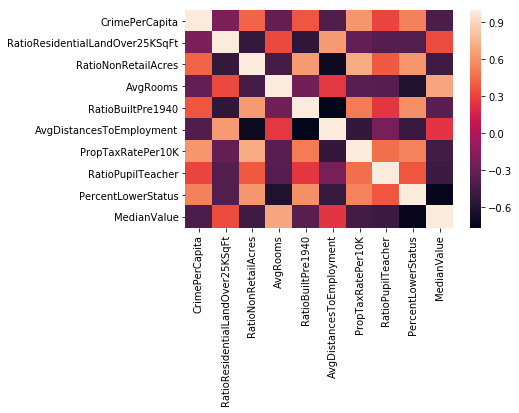

In [3]:
sns.heatmap(df.corr())

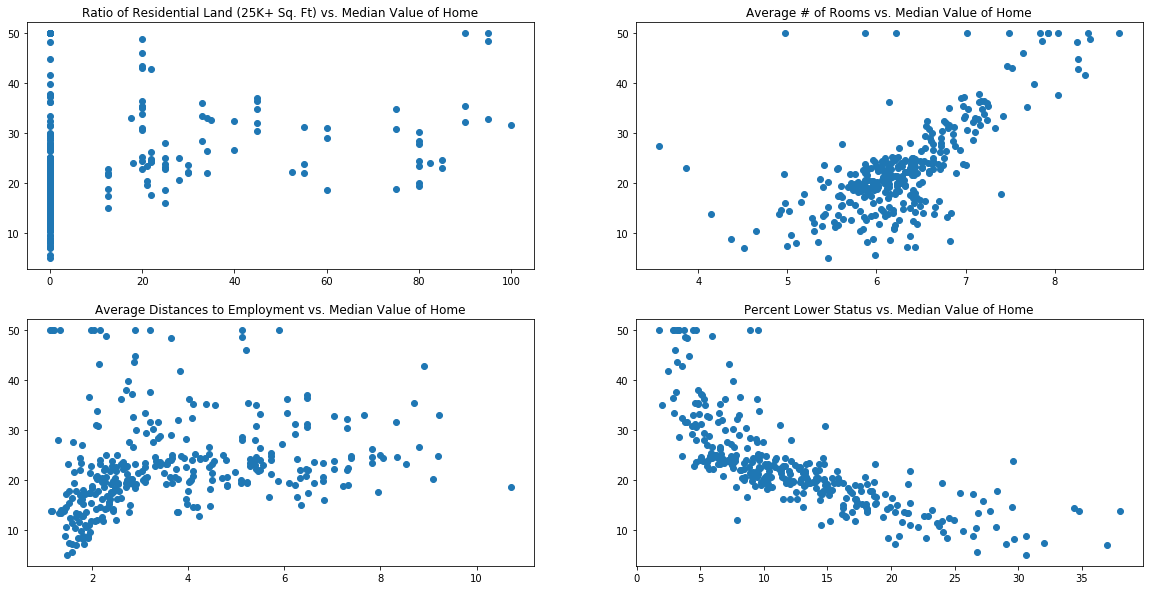

In [19]:
plt.figure(figsize=(20,10))

plt.subplot('221')
plt.scatter(df['RatioResidentialLandOver25KSqFt'].values, df['MedianValue'].values)
plt.title('Ratio of Residential Land (25K+ Sq. Ft) vs. Median Value of Home')

plt.subplot('222')
plt.scatter(df['AvgRooms'].values, df['MedianValue'].values)
plt.title('Average # of Rooms vs. Median Value of Home')

plt.subplot('223')
plt.scatter(df['AvgDistancesToEmployment'].values, df['MedianValue'].values)
plt.title('Average Distances to Employment vs. Median Value of Home')

plt.subplot('224')
plt.scatter(df['PercentLowerStatus'].values, df['MedianValue'].values)
plt.title('Percent Lower Status vs. Median Value of Home')

plt.show()

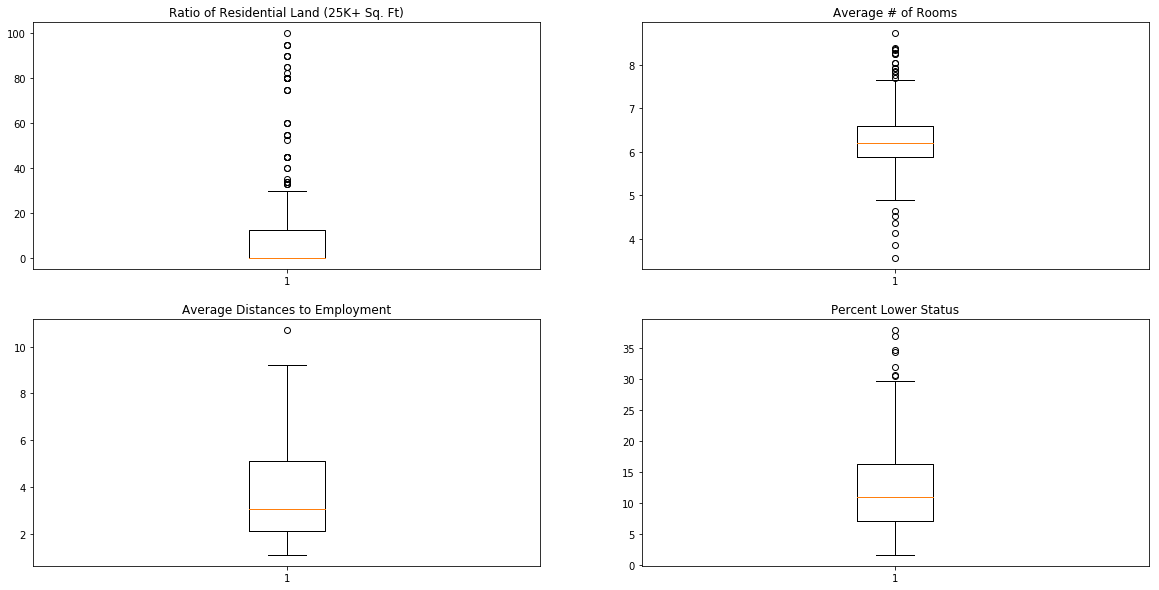

In [22]:
plt.figure(figsize=(20,10))

plt.subplot('221')
plt.boxplot(df['RatioResidentialLandOver25KSqFt'].values)
plt.title('Ratio of Residential Land (25K+ Sq. Ft)')

plt.subplot('222')
plt.boxplot(df['AvgRooms'].values)
plt.title('Average # of Rooms')

plt.subplot('223')
plt.boxplot(df['AvgDistancesToEmployment'].values)
plt.title('Average Distances to Employment')

plt.subplot('224')
plt.boxplot(df['PercentLowerStatus'].values)
plt.title('Percent Lower Status')

plt.show()

In [ ]:
# REMOVE OUTLIERS

# df=pd.DataFrame({'Data':np.random.normal(size=200)})  #example dataset of normally distributed data. 
# df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
# df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] #or if you prefer the other way around

In [6]:
df = df.drop(['CrimePerCapita', 'RatioNonRetailAcres', 'RatioBuiltPre1940', 'PropTaxRatePer10K', 'RatioPupilTeacher'], axis=1)

# Choose predictors based on correlation map
X = df.iloc[:, 0:4].values
Y = df.iloc[:, 4].values

df.head()

,RatioResidentialLandOver25KSqFt,AvgRooms,AvgDistancesToEmployment,PercentLowerStatus,MedianValue
ID,,,,,
1,18.0,6.575,4.0900,4.98,24.0
2,0.0,6.421,4.9671,9.14,21.6
4,0.0,6.998,6.0622,2.94,33.4
5,0.0,7.147,6.0622,5.33,36.2
7,12.5,6.012,5.5605,12.43,22.9


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)  

In [8]:
# Normalize features before predicting
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## Using KNN Regression

In [9]:
regr_1 = KNNRegressor(n_neighbors=5, weights="distance")  
regr_1.fit(X_train, Y_train)  

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [10]:
y_pred = regr_1.predict(X_test)

In [11]:
score = cross_val_score(regr_1, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.31 (+/- 0.57)


## Using OLS Regression

In [12]:
regr_2 = linear_model.LinearRegression()
regr_2.fit(X_train, Y_train)
regr_2.predict(X_test)

score = cross_val_score(regr_2, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.16 (+/- 1.24)


In [13]:
# linear_formula = 'MedianValue ~ RatioResidentialLandOver25KSqFt + AvgRooms + AvgDistancesToEmployment + PercentLowerStatus'

# # Fit model to our data using model formula.
# regr_2 = smf.ols(formula=linear_formula, data=df).fit()
# print('Params:', regr_2.params)

# print('\nP-Values:', regr_2.pvalues)

# print('\nR-squared (regular vs. adjusted):', regr_2.rsquared, regr_2.rsquared_adj)

## Conclusion

It seems like my KNN regression model is working better than my OLS model because the data contains a lot of outliers. 

These outliers may be skewing my OLS regression model, because it penalizes for distance from a single best-fit line. However, the KNN model is unaffected, because it does not care about outliers – only those points most closely neighboring the data point in question.